In [9]:
# 1.The Bootstrap and The Normal Curve

In [33]:
import datascience as ds
from datascience import Table
import numpy as np


In [34]:
pop_restaurants=Table.read_table('E:\\5502\\restaurant_inspection_scores.csv').drop('Address','Process Description')
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Facility ID
6M Grocery,78652,01/17/2014,90,2803436
6M Grocery,78652,04/27/2015,93,2803436
6M Grocery,78652,05/02/2016,88,2803436
6M Grocery,78652,07/25/2014,100,2803436
6M Grocery,78652,10/21/2015,87,2803436
6M Grocery,78652,12/15/2014,93,2803436
7 Eleven #36575,78660,01/25/2016,92,10874330
7 Eleven #36575,78660,03/05/2015,86,10874330
7 Eleven #36575,78660,03/14/2014,93,10874330
7 Eleven #36575,78660,07/27/2015,97,10874330


In [35]:
pop_restaurants.hist('Score')

In [36]:
pop_mean=np.mean(pop_restaurants.column('Score'))
pop_mean

91.40706693478886

In [37]:
restaurant_sample=pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Facility ID
Jersey Mike's Subs,78704,05/19/2016,97,11414602
"Iron Bear, The",78701,10/22/2014,94,10518840
"Grand Billiards, The",78751,07/02/2015,96,10099732
Mets Mart,78745,07/17/2015,93,2803666
Austin Vegetarian,78751,07/16/2015,100,10678584
Domino's Pizza-Store #6404,78741,06/26/2014,88,10996583
Elroy & Ross Market,78617,08/07/2015,96,10969915
Dolce Vita,78751,07/30/2014,85,2803266
Pok-E-Jo's,78758,06/29/2015,89,2801171
Short Stop,78745,05/19/2014,82,2801588


In [38]:
restaurant_sample.hist('Score')

In [39]:
sample_mean=np.mean(restaurant_sample.column('Score'))
sample_mean

90.74

In [41]:
#1.1 Question 1

import datascience as ds
from datascience import Table
import numpy as np
rests=Table.read_table('E:\\5502\\restaurant_inspection_scores.csv').drop('Address','Facility ID')
restaurant_sample=rests.sample(100, with_replacement=False)
def one_resampled_mean(data): 
    resampled_data=data.select('Score').sample().column(0)
    return np.mean(resampled_data) 
this_mean=one_resampled_mean(restaurant_sample)
this_mean

92.57

In [42]:
#1.2 Question 2

rests=Table.read_table('E:\\5502\\restaurant_inspection_scores.csv').drop('Address','Facility ID')
restaurant_sample=rests.sample(100, with_replacement=False)
def bootstrap_scores(): 
    resampled_means = ds.util.make_array()
    for i in range(5000):
        resampled_mean = one_resampled_mean(restaurant_sample)
        resampled_means = np.append(resampled_means, resampled_mean)
    return resampled_means
resampled_means = bootstrap_scores() 
resampled_means

array([91.86, 91.76, 90.49, ..., 91.74, 90.49, 91.74])

In [49]:
#1.3 Question 3

rests=Table.read_table('E:\\5502\\restaurant_inspection_scores.csv').drop('Address','Facility ID')
restaurant_sample=rests.sample(100, with_replacement=False)
def bootstrap_scores():
    resampled_means = ds.util.make_array()
    for i in range(5000):
        resampled_mean = one_resampled_mean(restaurant_sample)
        resampled_means = np.append(resampled_means, resampled_mean)
    return resampled_means
resampled_means = bootstrap_scores()
resampled_means
lower_bound = np.percentile(resampled_means,2.5)#Take 2.5 percentile of normal Distribution
upper_bound = np.percentile(resampled_means,97.5)#Take 97.5 percentile of normal Distribution
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound,',',upper_bound,")")



95% confidence interval for the average restaurant score, computed by bootstrapping:
( 90.61 , 93.44 )


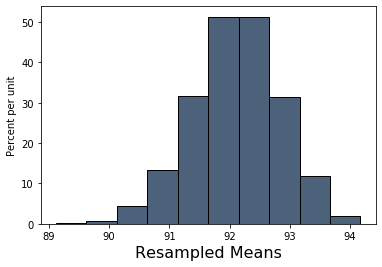

In [50]:
#1.4 Question 4

get_ipython().run_line_magic('matplotlib', 'inline')
Table().with_column('Resampled Means', resampled_means).hist()

In [51]:
#1.6 Question 6

sample_mean = np.mean(restaurant_sample.column(3))
Standard_deviation_sample = np.std(restaurant_sample.column(3))
sample_row_size = restaurant_sample.num_rows
means_standard_deviation = Standard_deviation_sample/np.sqrt(sample_row_size)
lower_bound_distribution = sample_mean-(2*means_standard_deviation)
upper_bound_distribution = sample_mean+(2*means_standard_deviation)
print(f"95% confidence interval for the average restaurant score is \n({lower_bound_distribution},{upper_bound_distribution})")


95% confidence interval for the average restaurant score is 
(90.66775208727987,93.57224791272014)


In [52]:
# 2.Testing the Central Limit Theorem

In [54]:
#2.1 Question 1

coin_proportions = ds.util.make_array(.5, .5) 
def one_statistic_prop_heads(n):
    simulated_proportions = ds.util.sample_proportions(n, coin_proportions)
    prop_heads = simulated_proportions.item(0)
    return prop_heads
one_statistic_prop_heads(10)


0.5

In [55]:
#2.2 Question 2

def sample_size_n(n):
    coin_proportions = ds.util.make_array(.5, .5)
    heads_proportions = ds.util.make_array()
    for i in np.arange(5000):
        prop_heads = one_statistic_prop_heads(n)
        heads_proportions = np.append(heads_proportions, prop_heads)
    return heads_proportions
sample_size_n(10)


array([0.5, 0.8, 0.4, ..., 0.2, 0.4, 0.5])

In [56]:
#2.3 Question 3

flight_delay=Table.read_table("E:\\5502\\united_summer2015.csv")
def emperical_sample_mean_sd(n):
    sample_means=ds.util.make_array()
    for i in np.arange(500):
        sample=flight_delay.sample(10, with_replacement=True)
        sample_mean=np.mean(sample.column('Delay'))
        sample_means=np.append(sample_means,sample_mean)
    return np.std(sample_means) 
emperical_sample_mean_sd(10)

12.458899238696812

In [57]:
flight_delay

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [58]:
#2.4 Question 4

def predict_sample_mean_sd(n):
    return np.std(flight_delay.column('Delay'))/n**0.5 
predict_sample_mean_sd(10)


12.484735400972708